In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import watermark
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [159]:
%reload_ext watermark
%watermark -a "Guilherme"
%watermark --iversion

Author: Guilherme

seaborn   : 0.13.2
matplotlib: 3.9.2
watermark : 2.5.0
pandas    : 2.2.2



In [94]:
# Carregando os dados
df = pd.read_csv('resultado_projeto7.csv')

In [9]:
# Visualizando as duas primeiras linhas
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1


In [5]:
# Estrutura dos dados
df.shape

(68629, 22)

In [7]:
# Metadados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

# Respondendo perguntas de negócio

### 1 - Total de medicamentos consumidos por faixa estária

In [10]:
# Verificando a distribuição da coluna de numero de medicamentos
df['num_med'].value_counts()

num_med
1    30535
0    16627
2    14966
3     5465
4      983
5       49
6        4
Name: count, dtype: int64

In [72]:
# Agrupando por faixa de idade e somando o númnero de medicamentos
perguna1 = pd.DataFrame(df.groupby('age')['num_med'].sum()).reset_index()
perguna1

,age,num_med
0,[0-50),11838
1,[50-60),14847
2,[60-70),19231
3,[70-80),20981
4,[80-100),14166


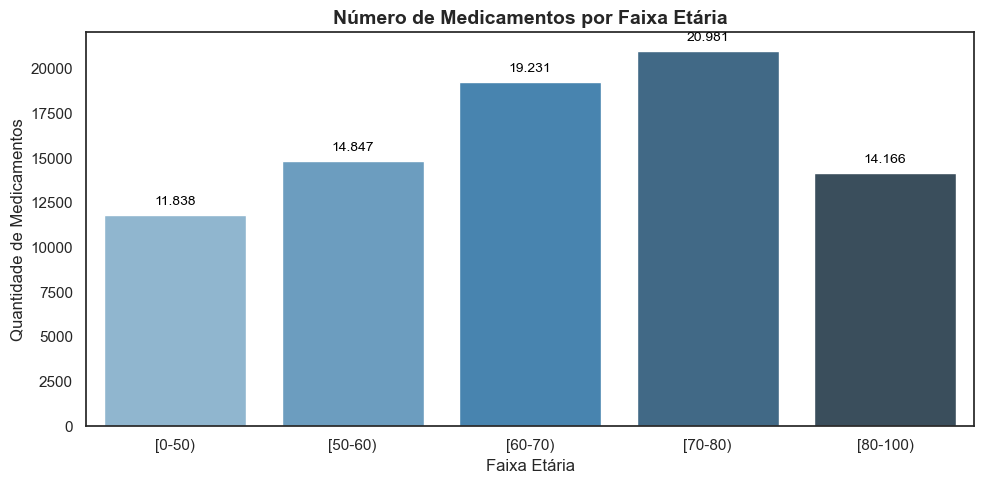

In [82]:
# Criando o grádico

plt.figure(figsize=(10, 5))
sns.set_style("white")

# Gráfico de barras
ax = sns.barplot(data=perguna1, x='age', y='num_med', palette='Blues_d')

# Título e rótulos
plt.title('Número de Medicamentos por Faixa Etária', fontsize=14, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Quantidade de Medicamentos', fontsize=12)

# Adiciona os valores acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),  # formata com separador de milhar
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


Conclusão: Para este conjunto de dados a Faixa entre 70-80 anos é a que recebeu mais medicamentos

### 2 - Total de readmissões de pacientes diabéticos por genero

In [45]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1


In [95]:
# Filtrando somente os pacientes diagnosticdos com diabete

pacientes_diabeticos = df.query('diabetesMed == 1')

In [96]:
# Sumarizando o número de readmitidos por generpo e criando um dataframe
pergunta2 = pd.DataFrame(pacientes_diabeticos.groupby('gender')['readmitted'].sum()).reset_index()
pergunta2

,gender,readmitted
0,0,11887
1,1,10079


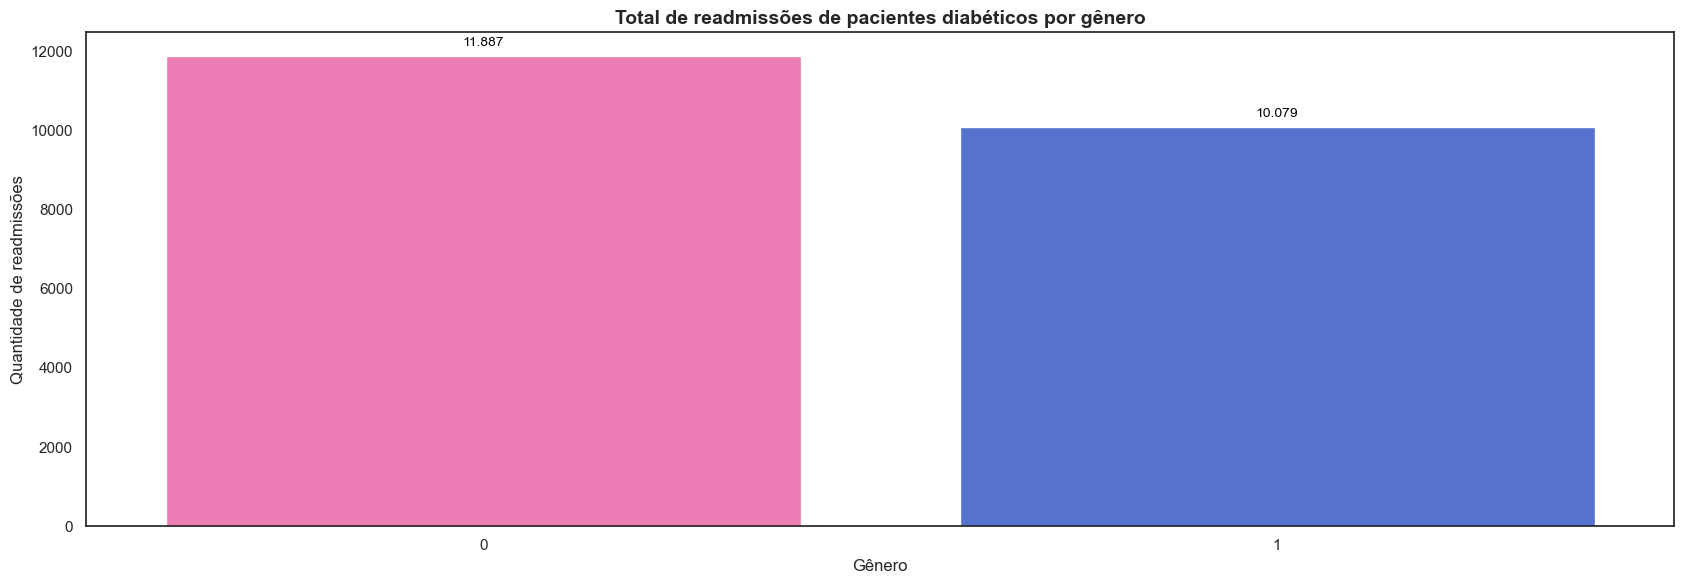

In [100]:
# 1️Substitui os valores 0 e 1 por rótulos mais claros
#pergunta2['gender'] = pergunta2['gender'].map({0: 'Feminino', 1: 'Masculino'})

# 2️ Define cores diferentes para cada barra
cores = ['#FF69B4', '#4169E1']  # rosa para feminino, azul para masculino

plt.figure(figsize=(17, 6))
sns.set_style("white")

# 3 Gráfico com cores personalizadas
ax = sns.barplot(data=pergunta2, x='gender', y='readmitted', palette=cores)

# Título e rótulos
plt.title("Total de readmissões de pacientes diabéticos por gênero", fontsize=14, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de readmissões', fontsize=12)

# 4️ Adiciona os valores acima das barras com ponto como separador
for p in ax.patches:
    height = p.get_height()
    valor_formatado = f'{int(height):,}'.replace(',', '.')  # troca vírgula por ponto
    ax.annotate(valor_formatado,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [102]:
# Verificando proporcionalmente qual sexto possui mais readmissões
prop_readmissoes = round(pd.crosstab(pacientes_diabeticos['gender'], pacientes_diabeticos['readmitted'],normalize='index') * 100,2).rename(index={0:'Feminino',1:'Masculino'}, columns={0:'Não readmitido',1:'Readmitido'})
prop_readmissoes =  prop_readmissoes.rename_axis(index=None,columns=None)
prop_readmissoes

,Não readmitido,Readmitido
Feminino,56.70,43.30
Masculino,58.95,41.05


Conclusao: Para este conjunto de dados os pacientes do sexo feminino possuem mais readmissões e proporcionalmemnte também possuem um % maior de readmissões

### 3- Total de readmissões de pacientes por faixa etária

In [4]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1


In [63]:
# Realizando a soma de readmissões por faixa etária
pergunta3 = pd.DataFrame(df.groupby('age')['readmitted'].sum()).reset_index()
pergunta3

,age,readmitted
0,[0-50),3679
1,[50-60),4504
2,[60-70),6220
3,[70-80),7778
4,[80-100),5569


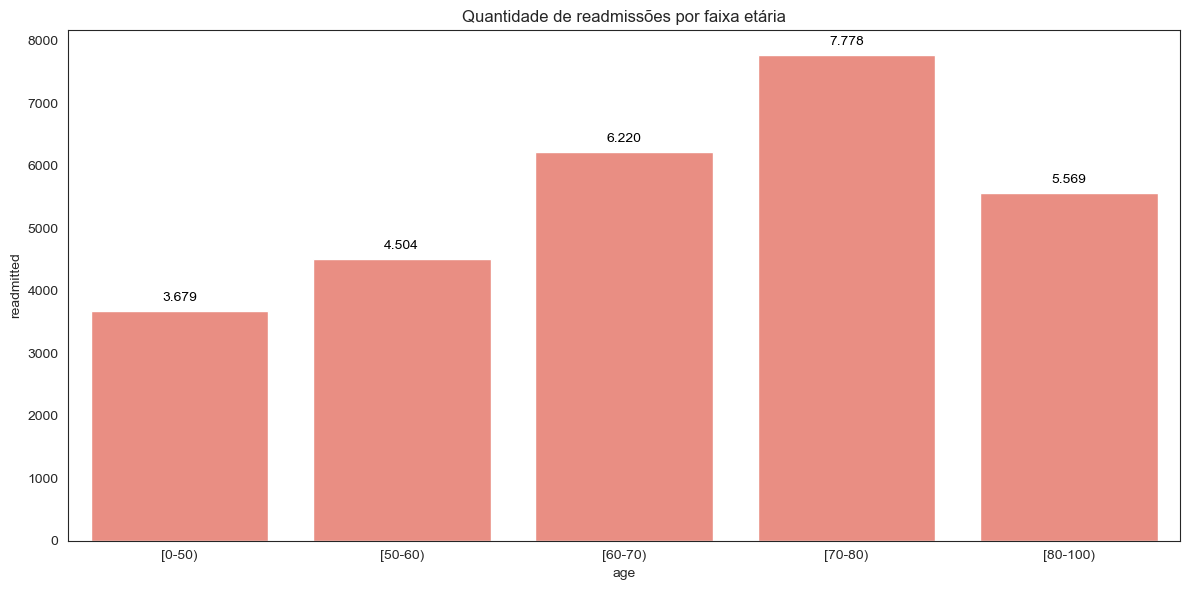

In [80]:
# Respondendo graficamente
plt.figure(figsize = (12,6))
ax = sns.barplot(data=pergunta3,x='age',y='readmitted',color='salmon')
plt.title('Quantidade de readmissões por faixa etária', fontsize=12)
sns.set_style('white')
for p in ax.patches:
    height = p.get_height()
    valor_formatado = f'{int(height):,}'.replace(',', '.')  # troca vírgula por ponto
    ax.annotate(valor_formatado,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [58]:
# Verificando a proporcionalmente

round(pd.crosstab(df['age'],df['readmitted'], normalize='index').rename_axis(index=None,columns=None).rename(columns={0:'Não readmitido',1:'Readmitido'}) *100,2)

,Não readmitido,Readmitido
[0-50),64.92,35.08
[50-60),62.46,37.54
[60-70),59.65,40.35
[70-80),55.91,44.09
[80-100),57.45,42.55


Conclusão: Para este conjunto de dados o número de readmissões para a faixa de idade entre 70-80 anos é maior que as demais
proporcionalmente também, cerca de 44,1% dos pacientes nesta faixa são readmitidos

### 4- Percentual de readmissões e não readmissões por faixa etária

In [27]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1


In [19]:
pergunta4 = round(pd.crosstab(df.age, df.readmitted, margins=True,normalize='index') * 100,2).reset_index()
pergunta4.rename(columns={0:'Não',1:'Sim'}, inplace=True)
pergunta4

readmitted,age,Não,Sim
0,[0-50),64.92,35.08
1,[50-60),62.46,37.54
2,[60-70),59.65,40.35
3,[70-80),55.91,44.09
4,[80-100),57.45,42.55
5,All,59.57,40.43


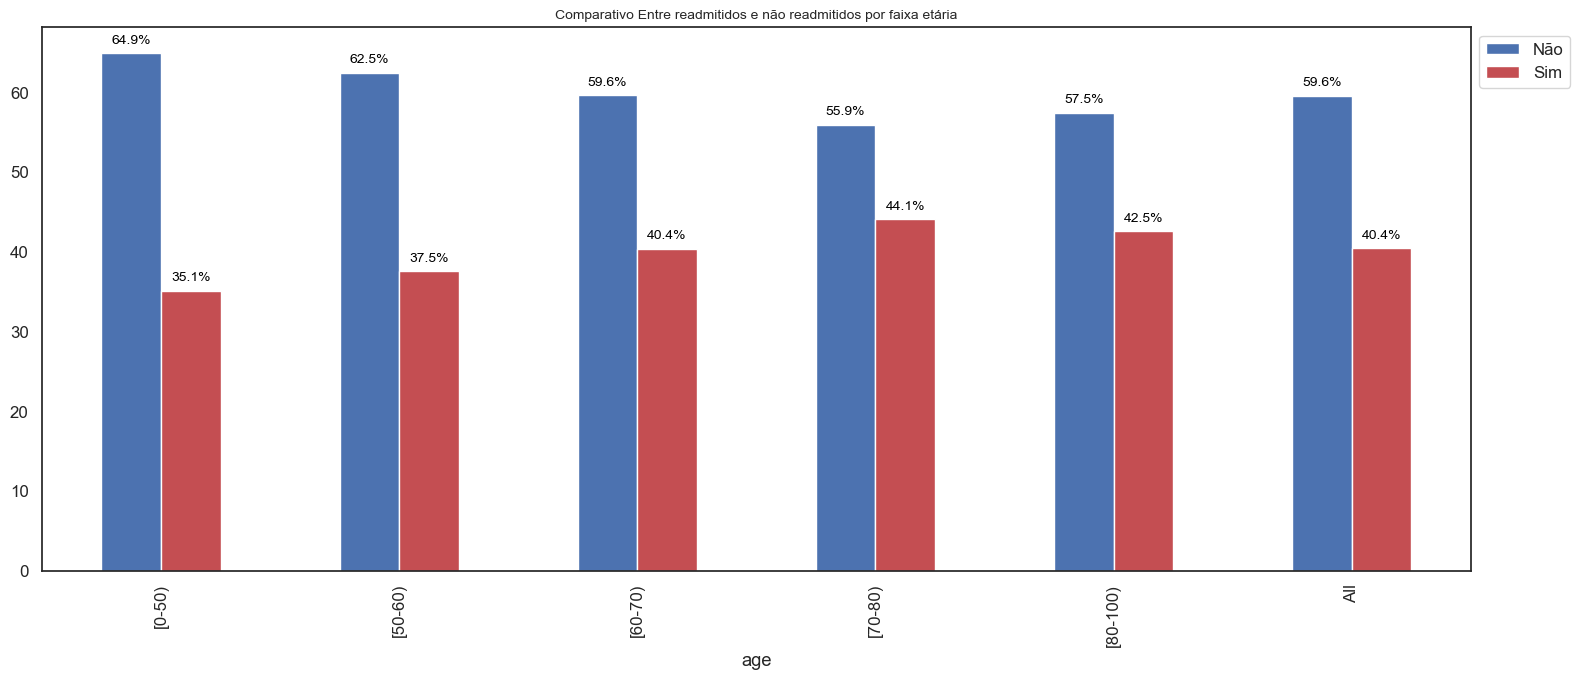

In [22]:
sns.set_theme(style='white', palette='deep', font_scale=1.1)
ax = pergunta4.plot(kind = 'bar', x = 'age', y = ['Não','Sim'], figsize = (16,7), color = ['b','r'] )
ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Posiciona a legenda fora do gráfico (à direita)
for p in ax.patches:
    height = p.get_height()
    valor_formatado = f'{height:.1f}%'  
    ax.annotate(valor_formatado,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Comparativo Entre readmitidos e não readmitidos por faixa etária', fontsize = 10)
plt.tight_layout()
plt.show()

Conclusão: Para este conjunto de dados a faixa etaria entre 70-80 posssui maior percentual de readmissão, enquanto 0-50 possui o menor.

### 5- Total de radmissões de pacientes por genero, por idade e por tipo de admissão

<Figure size 1600x1000 with 0 Axes>

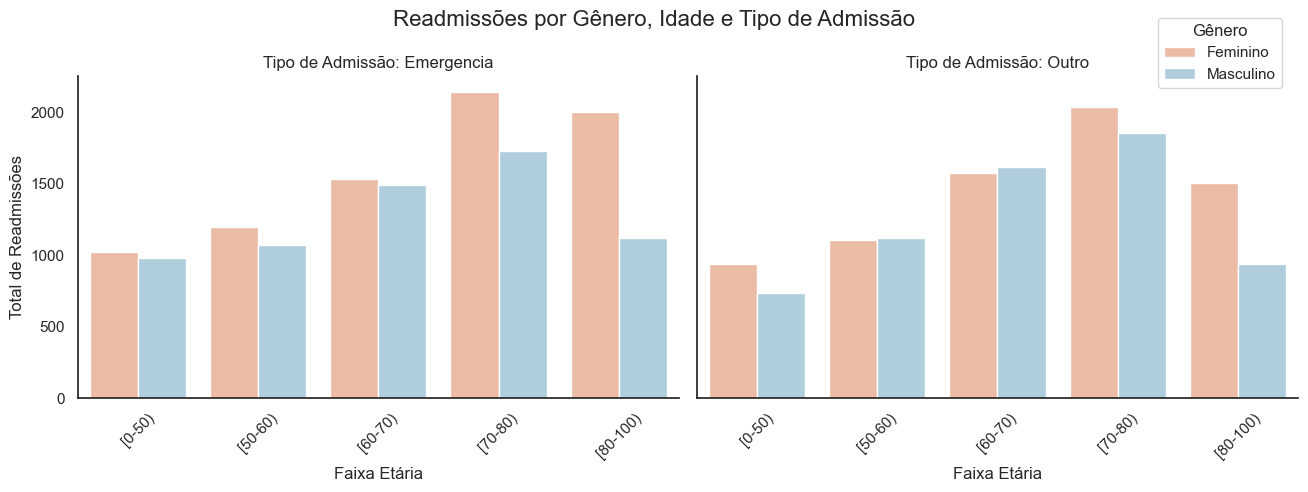

In [45]:
# Preparando os dados
df['gender'] = df['gender'].replace({0: 'Feminino', 1: 'Masculino'})
df_agrupado = df.groupby(['gender', 'age', 'admission_type_id'])['readmitted'].sum().reset_index()

plt.figure(figsize=(16,10))
# Gráfico de barras agrupadas
sns.set_theme(style='white')
g = sns.catplot(
    data=df_agrupado,
    kind='bar',
    x='age',
    y='readmitted',
    hue='gender',
    col='admission_type_id',
    palette='RdBu',
    height=5,
    aspect=1.2,
    ci=None,
)

g.set_axis_labels("Faixa Etária", "Total de Readmissões")
g.set_titles("Tipo de Admissão: {col_name}")
g.fig.suptitle("Readmissões por Gênero, Idade e Tipo de Admissão", fontsize=16)
g.legend.remove()
g.fig.legend(
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    title='Gênero'
)
# Rotaciona os rótulos do eixo x em todos os subplots
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


Conclusão: Para este conjunto de dados o único cenário em que o sexo masculo possui maior readmissão é na faixa entre 50-60 anos e do tipo 'Outro', em geral o sexo feminino possui mais readmissões especialmente quando se trata de emergência.

### 6 - Total de radmissões/Não readmissões por genero e por raça

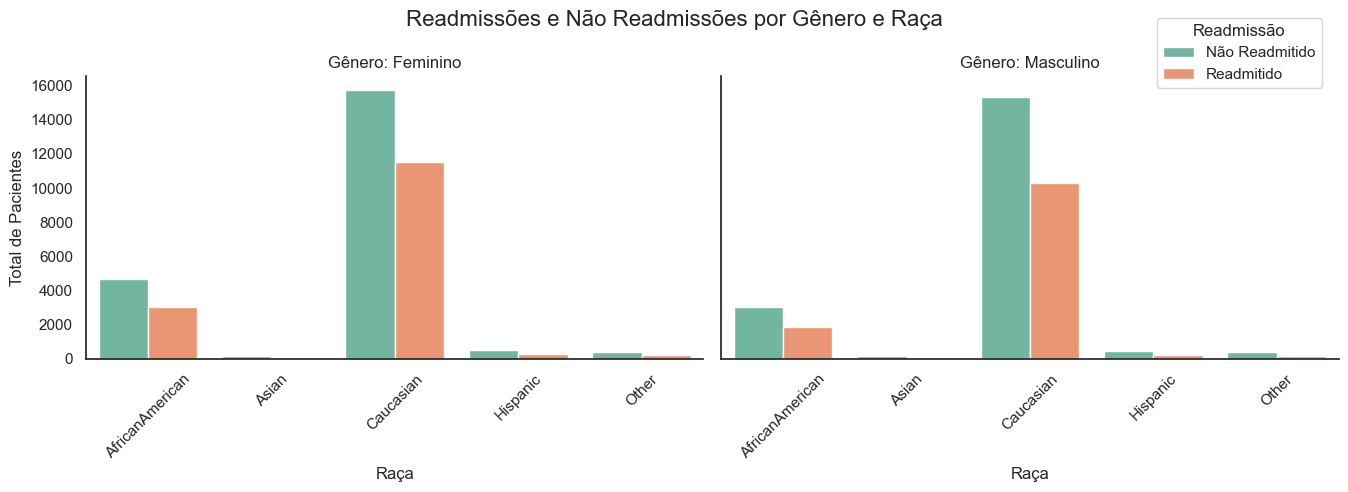

In [59]:
# Substituindo os valores de gênero para facilitar a leitura
df['gender'] = df['gender'].replace({0: 'Feminino', 1: 'Masculino'})

# Substituindo os valores de readmissão para facilitar a leitura
df['readmitted_label'] = df['readmitted'].replace({0: 'Não Readmitido', 1: 'Readmitido'})

# Agrupando os dados por gênero, raça e readmissão
df_agrupado = df.groupby(['gender', 'race', 'readmitted_label']).size().reset_index(name='total')

# Criando o gráfico
sns.set_theme(style='white')
g = sns.catplot(
    data=df_agrupado,
    kind='bar',
    x='race',
    y='total',
    hue='readmitted_label',
    col='gender',
    palette='Set2',
    height=5,
    aspect=1.2
)

g.set_axis_labels("Raça", "Total de Pacientes")
g.set_titles("Gênero: {col_name}")
g.fig.suptitle("Readmissões e Não Readmissões por Gênero e Raça", fontsize=16)
g.legend.remove()
g.fig.legend(
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    title='Readmissão')


# Rotaciona os rótulos do eixo x em todos os subplots
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


Conclusão: Para esse conjunto de dados a Raça Caucasian é a que possui maior readmissão hospitalar independete do sexo.

### 7 - Número de visitas x Comorbidade

In [61]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med,readmitted_label
0,149190,55629189,Caucasian,Feminino,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1,Readmitido
1,64410,86047875,AfricanAmerican,Feminino,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1,Não Readmitido


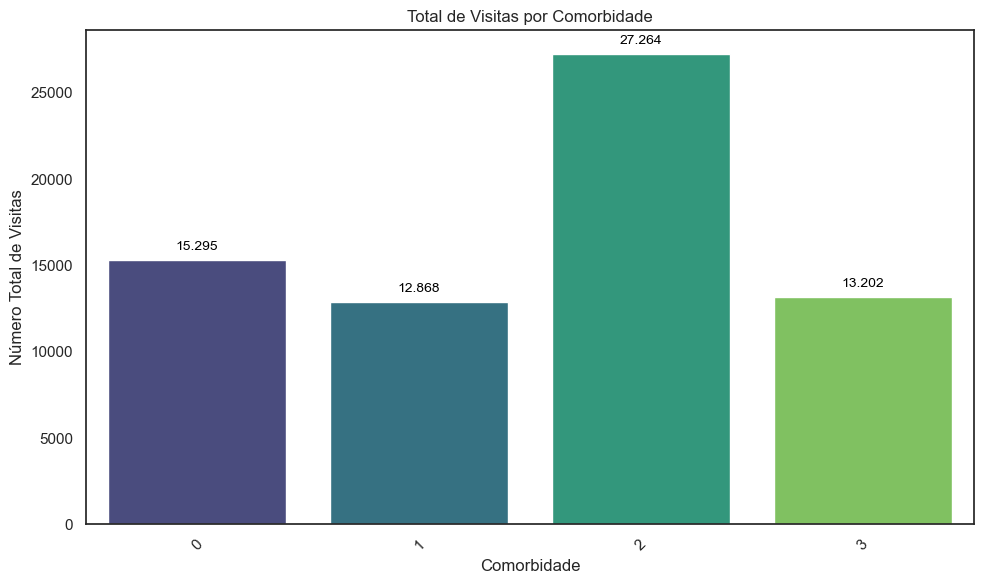

In [81]:
# Agrupando os dados por comorbidade e somando as visitas
visitas_por_comorbidade = df.groupby('comorbidade')['total_visitas'].count().reset_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style='white')
ax = sns.barplot(data=visitas_por_comorbidade, x='comorbidade', y='total_visitas', palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),  # formata com separador de milhar
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


# Ajustes visuais
plt.title('Total de Visitas por Comorbidade')
plt.xlabel('Comorbidade')
plt.ylabel('Número Total de Visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusão:Para esse conjunto de dados a maioria dos pacientes que visitam o hospital possuem o nível 2 de comorbidade.

# 8 - Proporção de readmissões pelo número de visitas antes da alta

In [7]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med,total_visitas
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1,0
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1,3


In [125]:
# Contagem total de pacientes por número de visitas
total_por_visitas = df.groupby('number_inpatient')['readmitted'].count()

# Contagem de readmitidos por número de visitas
readmitidos_por_visita = df[df['readmitted'] == 1].groupby('number_inpatient')['readmitted'].count()

# Proporção de readmissões
proporcao_readmissao = (round((readmitidos_por_visita / total_por_visitas),2)*100).reset_index()
proporcao_readmissao.columns = ['total_visitas', 'proporcao_readmissao']


In [126]:
proporcao_readmissao

,total_visitas,proporcao_readmissao
0,0,38.0
1,1,54.0
2,2,65.0
3,3,71.0
4,4,76.0
5,5,80.0
6,6,88.0
7,7,90.0
8,8,83.0
9,9,75.0


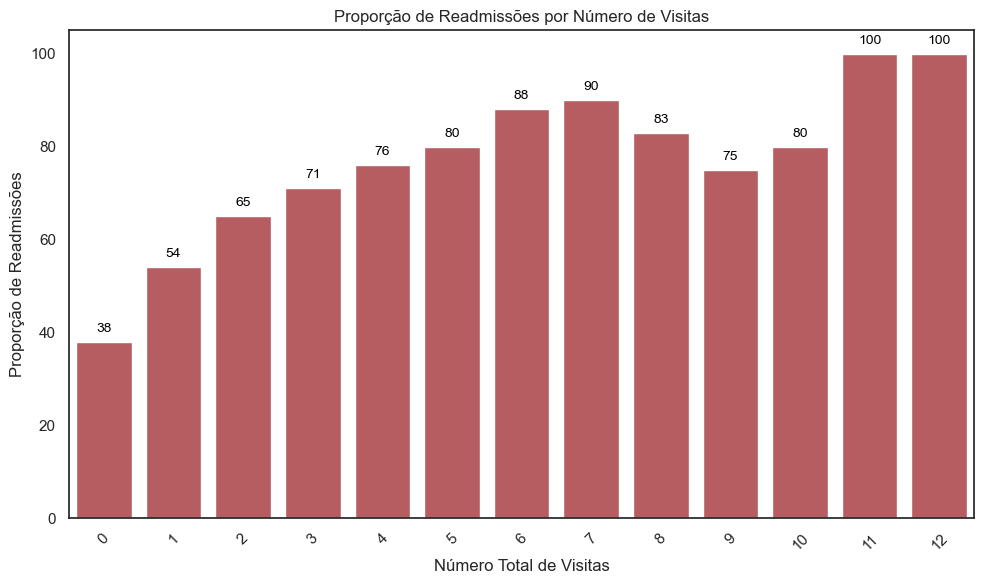

In [129]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=proporcao_readmissao, x='total_visitas', y='proporcao_readmissao', color='r')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}'.replace(',', '.'),  # formata com separador de milhar
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Proporção de Readmissões por Número de Visitas')
plt.xlabel('Número Total de Visitas')
plt.ylabel('Proporção de Readmissões')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusão: Quanto maior o número de visitas maior o percentual de readmissão, isso indica que as visitas se devem na grande parte por reamissões, isso é pessímo, pois indica oportunidade no tratamento da causa raiz.

# 9- Qual a frequência de número de medicamentos consumidos

In [132]:
frequencia_med  = df['num_medications'].value_counts().sort_index().reset_index().rename(columns={'count':'frequencia'})

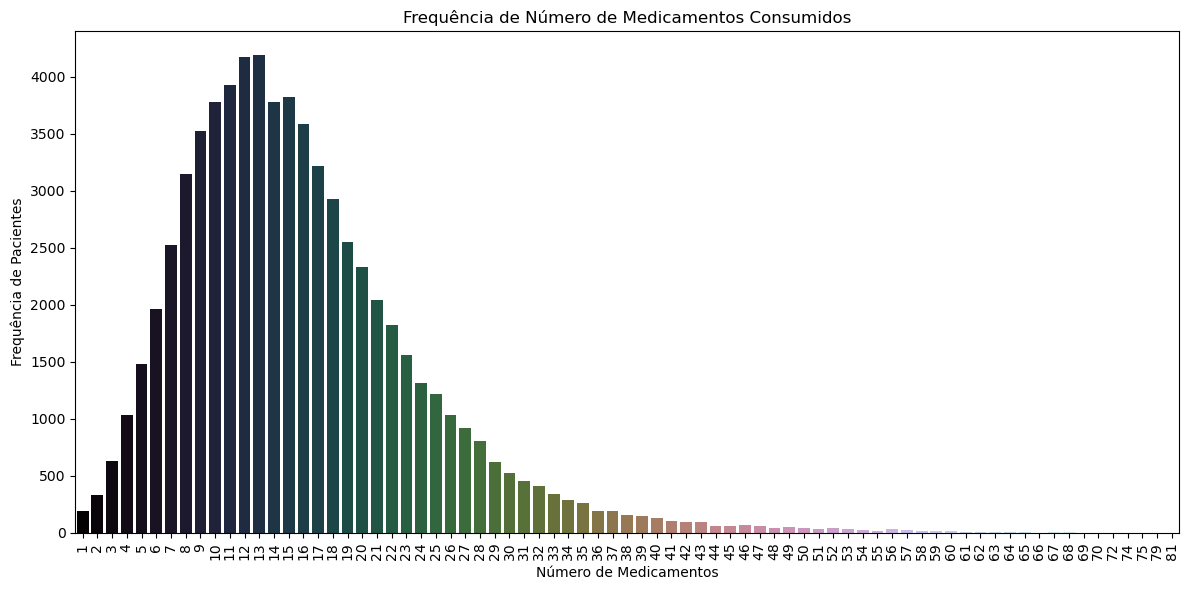

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=frequencia_med, x='num_medications', y='frequencia', palette='cubehelix')
plt.title('Frequência de Número de Medicamentos Consumidos')
plt.xlabel('Número de Medicamentos')
plt.ylabel('Frequência de Pacientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Conclusão: 13 é mair número de medicamentos aplicados

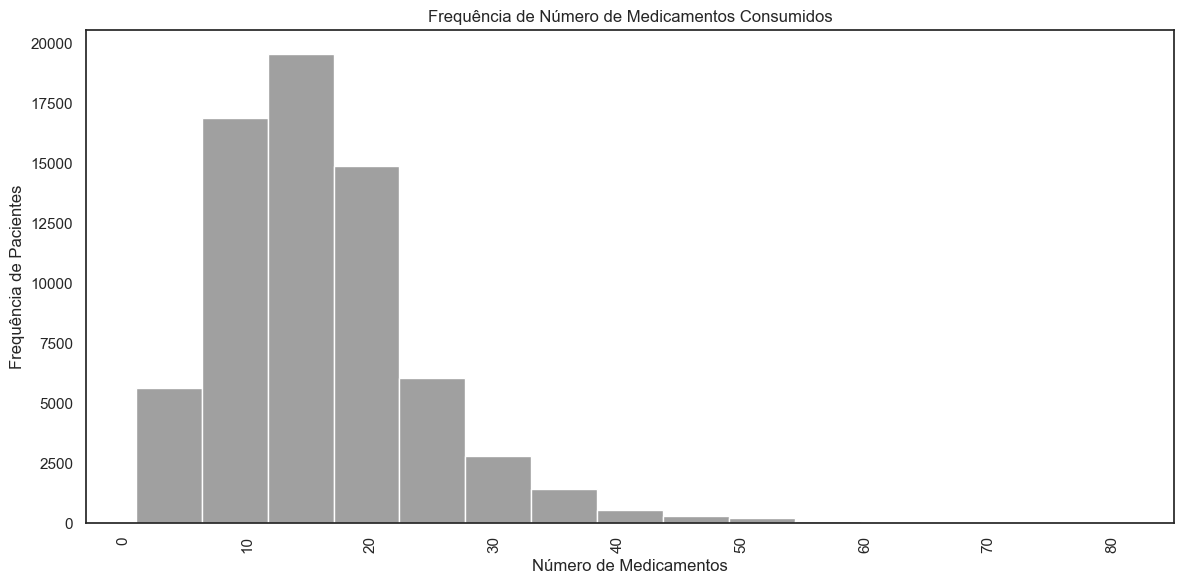

In [150]:
# Verificando através de um histograma
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='num_medications', bins=15, color = 'gray')
plt.title('Frequência de Número de Medicamentos Consumidos')
plt.xlabel('Número de Medicamentos')
plt.ylabel('Frequência de Pacientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Conclusão: É possível identificar a distribuição por faixa, entre 5 e 20 medicamentos aplicados tem uma alta frequência.


# 10 - Comportamento do Paciente por Procedimentos clinicos

In [153]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,1,0,1,0,1


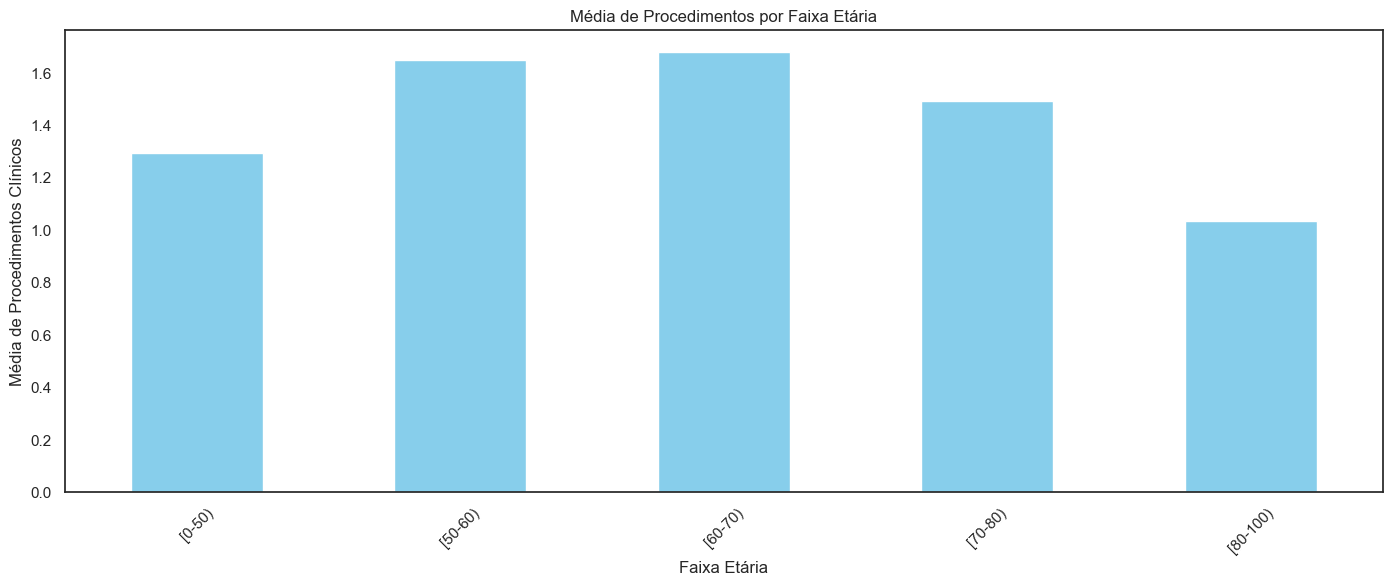

In [155]:

procedimentos_por_idade = df.groupby('age')['num_procedures'].mean().sort_index()

plt.figure(figsize=(17,6))
procedimentos_por_idade.plot(kind='bar', color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Procedimentos Clínicos')
plt.title('Média de Procedimentos por Faixa Etária')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


Conclusão: Para esse conjunto de dados, em média, a maior faixa etária que recebe procedimentos clinicos é entre 60-70 anos.

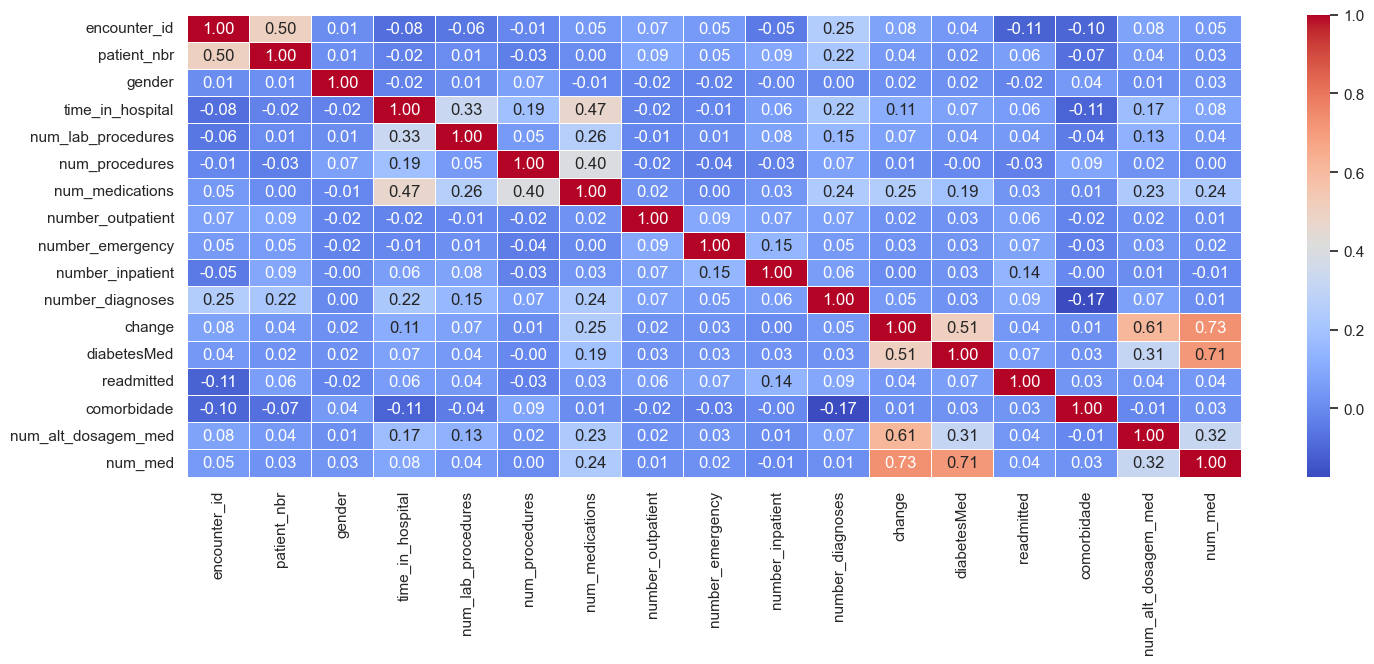

In [183]:
# Selecionando somente as colunas númerias e aplicando a correlação de pearson
df_correlacao = df.select_dtypes(include='int64').corr()

plt.figure(figsize=(17,6))
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

Conclusão: Existe uma forte correlação entre o número de medicamentos e as mudanças no quadro do paciente.

In [164]:
%watermark -a "Guilherme"
%watermark --iversions

Author: Guilherme

seaborn   : 0.13.2
matplotlib: 3.9.2
watermark : 2.5.0
pandas    : 2.2.2

